# Notebook 8: Probability, Hypothesis and Inference

In [8]:
from collections import Counter
import math, random
import matplotlib.pyplot as plt
from scipy.stats import norm, zscore

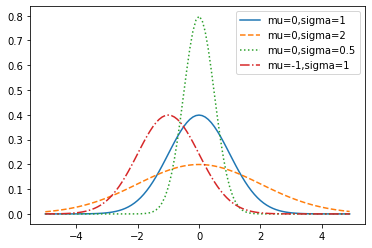

In [2]:
# The normal distribution is the king of distributions. It is the classic bell curve–shaped
# distribution and is completely determined by two parameters: its mean μ (mu) and its standard deviation σ (sigma).
# The mean indicates where the bell is centered, and the standard deviation how “wide” it is.
# When μ = 0 and σ = 1, it’s called the standard normal distribution.
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

def plot_normal_pdfs():
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_pdf(x,mu=-1)   for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend()
    plt.show()
plot_normal_pdfs()

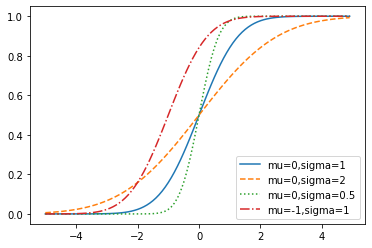

In [3]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def plot_normal_cdfs():
    xs = [x / 10.0 for x in range(-50, 50)]
    plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
    plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
    plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
    plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
    plt.legend(loc=4) # bottom right
    plt.show()
plot_normal_cdfs()

In [40]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z


In [ ]:
inverse_normal_cdf(0.16,0,1,0.0000001)

<img src="normal_dist.jpg" style="height:400px">

In [ ]:
# Given X ~ N(50,10)
# What are the values for mean and standart deviation ?
# What values of X has z-score of 1.4 ?
# what is the z-score that corresponds to 30

In [ ]:
# Z=(X-Mean)/Sigma
# X= Z*Sigma+Mean=1.4*10+50=64

In [ ]:
# The average test score  in a class was 74 with a standard deviation of 8. There are 2000 students in the class.
# a. what percetage of students scored less than 58 ?
# b. what is the probability that a student scored between 66 and 82 on the exam ?
# c. How many students scored at most 90 ?

#a) 2.5%
#b) 68%
#c) 97.5%

In [ ]:
# Normaly distributed IQ scores have a mean of 100 and a standard deviation of 15. Use z-table
# a. what is the probability of randomly selected someone with an IQ score that less than 80
# b. what is the probability of randomly selected someone with an IQ score that grater than 136

# a.) %9.17
# b.) 100-99.18=0.88 %

In [ ]:
# Link for Z-value  
# https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

<h3>The Central Limit Theorem </h3>
One reason the normal distribution is so useful is the central limit theorem, which
says (in essence) that a random variable defined as the average of a large number of
independent and identically distributed random variables is itself approximately normally
distributed.

In [ ]:
# bernoulli trial
#1. Each trial results in one of two possible outcomes, denoted success (S=1) or failure (F=0). 
#2. The probability of S remains constant from trial-to-trial and is p. Write q = 1−p for the constant probability of F.
#3. The trials are independent.


In [42]:
def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

In [45]:
[bernoulli_trial(0.5) for _ in range(10)]

[0, 1, 0, 0, 0, 0, 1, 0, 0, 1]

In [46]:
[binomial(0.5,10) for _ in range(20)]

[5, 6, 5, 8, 4, 4, 3, 3, 6, 4, 4, 6, 4, 2, 4, 4, 2, 5, 2, 1]

Counter({501: 286, 495: 281, 498: 274, 506: 261, 497: 259, 500: 258, 503: 254, 499: 250, 490: 237, 502: 231, 491: 230, 504: 230, 508: 227, 492: 225, 507: 224, 494: 221, 505: 220, 496: 217, 510: 210, 493: 209, 509: 200, 489: 197, 487: 188, 488: 182, 511: 177, 515: 176, 514: 173, 512: 162, 513: 158, 486: 157, 485: 155, 484: 153, 516: 152, 517: 142, 482: 132, 481: 125, 518: 125, 520: 124, 483: 123, 519: 117, 521: 107, 522: 106, 480: 105, 524: 101, 479: 100, 478: 98, 477: 92, 523: 88, 476: 82, 525: 76, 475: 68, 474: 64, 528: 62, 527: 58, 526: 56, 529: 53, 473: 50, 530: 49, 471: 46, 472: 43, 470: 40, 532: 39, 468: 37, 469: 34, 531: 33, 535: 31, 466: 23, 467: 23, 534: 22, 533: 21, 465: 20, 464: 20, 536: 19, 462: 19, 537: 18, 463: 18, 540: 16, 538: 13, 458: 11, 539: 11, 461: 11, 459: 9, 460: 8, 456: 8, 457: 7, 543: 6, 542: 5, 545: 5, 541: 5, 548: 4, 451: 4, 546: 4, 551: 3, 544: 3, 452: 3, 549: 2, 550: 2, 453: 2, 448: 2, 449: 1, 553: 1, 558: 1, 547: 1, 447: 1, 555: 1, 439: 1, 560: 1, 450: 1, 5

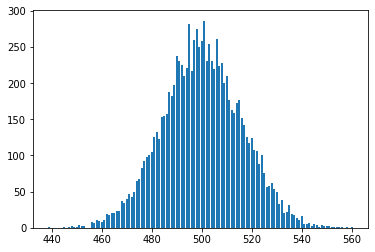

In [52]:

data = [binomial(0.5,1000) for _ in range(10000)]
c=Counter(data)
print(c)
plt.bar(c.keys(), c.values())
plt.show()

500.0 15.811388300841896
range(431, 563)


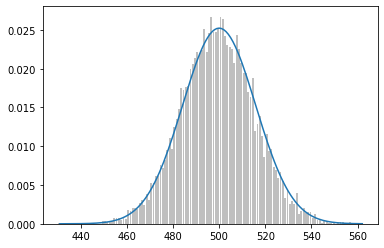

In [61]:

def make_hist(p, n, num_points):

    data = [binomial(p, n) for _ in range(num_points)]
    #print (data)
   
    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    print(mu,sigma)

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    print (xs)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)  for i in xs]
    #ys = [normal_pdf(i , mu, sigma)  for i in xs]
    plt.plot(xs,ys)
    plt.show()
make_hist(0.5, 1000, 10000)



### Statistical Hypothesis Testing

we have a null hypothesis H0 that represents some default position,
and some alternative hypothesis H1 that we’d like to compare it with. We use statistics
to decide whether we can reject H0 as false or not.

In [ ]:
# Company X manufactures calculators with the avarage weigh 450g, an engineer thinks that avarage weight is different and decide that avarage weight of 50 calculators, state null and altarnative hypothesis.

#Null H_o : M= 450
#Alternative H_a M not= 450

In [ ]:
# The teachers in a scool believes that at least 80% of the students graduates from the school. Student disagree with this percentage and conducts a test. state null and alternative hypothesis
# H_o : P >= 0.80
# H_a : P < 0.80

In [ ]:
# A tech company belives that the percentage of resident that own cell phone is %70. A marketing manager believes that the value is different. He conducts a survey of 200 individuals and found that 130 responded yes to owning a cell phone. a) state null and alternative hypothesis b) At 95% confidence, is there enough evience to reject the null hypothesis ?

H_o  Po = 0.70
H_a  P not= 0.70

n=200
x=130
PH= 130/200 =0.65
Z=(PH-Po)/sqrt((Po*Qo)/n) =( 0.65-0.70)/sqrt(0.7*0.3/200)=-1.54
The range for Z is -1.96 < Zc < 1.96
H_o is stays

In [ ]:
#example: Imagine we have a coin and we want to test whether it’s fair.
# our test will involve flipping the coin some number n times and counting the number of heads X. Each coin flip is a Bernoulli # trial, which means that X is a Binomial(n,p) random variable.
# H_o p= 0.5
# H_a p not=0.5
# n=1000
# p=0.5

In [62]:

from typing import Tuple
import math

def normal_approximation_to_binomial(n: int, p: float) -> Tuple[float, float]:
    """Returns mu and sigma corresponding to a Binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1 - p) * n)
    return mu, sigma





In [63]:
# let’s say that we choose to flip the coin n = 1000 times. If our hypothesis of fairness is true, X should be distributed approximately normally with mean 500 and standard deviation 15.8.
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(mu_0, sigma_0)



500.0 15.811388300841896


In [64]:

# The normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

# It's above the threshold if it's not below the threshold
def normal_probability_above(lo: float,
                             mu: float = 0,
                             sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is greater than lo."""
    return 1 - normal_cdf(lo, mu, sigma)

# It's between if it's less than hi, but not less than lo.
def normal_probability_between(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is between lo and hi."""
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

# It's outside if it's not between
def normal_probability_outside(lo: float,
                               hi: float,
                               mu: float = 0,
                               sigma: float = 1) -> float:
    """The probability that a N(mu, sigma) is not between lo and hi."""
    return 1 - normal_probability_between(lo, hi, mu, sigma)


def normal_upper_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float,
                       mu: float = 0,
                       sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

def normal_two_sided_bounds(probability: float,
                            mu: float = 0,
                            sigma: float = 1) -> Tuple[float, float]:
    """
    Returns the symmetric (about the mean) bounds
    that contain the specified probability
    """
    tail_probability = (1 - probability) / 2

    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)

    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)

    return lower_bound, upper_bound



In [65]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """
    How likely are we to see a value at least as extreme as x (in either
    direction) if our values are from a N(mu, sigma)?
    """
    if x >= mu:
        # x is greater than the mean, so the tail is everything greater than x
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x is less than the mean, so the tail is everything less than x
        return 2 * normal_probability_below(x, mu, sigma)



In [66]:
normal_lower_bound(0.975, 500.0, 15.811388300841896)

469.01026640487555

In [67]:
normal_upper_bound(0.975, 500.0, 15.811388300841896)

530.9897335951244

In [68]:
# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, 500.0, 15.811388300841896)
print(lo, hi )

469.01026640487555 530.9897335951244


In [39]:
two_sided_p_value(529.5, mu_0, sigma_0)   # 0.062

0.06207721579598835

In [72]:
norm (500,15.81).mean()

500.0

In [73]:
norm (500,15.81).std()

15.81

In [74]:
norm (500,15.81).cdf(529.5)

0.9689728566747079

In [55]:
norm (500,15.81).cdf(529.5)

0.9746282377582929

In [78]:
#norm.cdf(target, loc=sample_mean, scale=std_error)
lessthanX=norm.cdf(x=491, loc=500, scale=15.81)
print(lessthanX)

0.28458986682382087


In [75]:
norm.ppf(0.95)

1.6448536269514722

In [76]:
norm.cdf(1.64)

0.9494974165258963